In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install retina-face

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 29.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 34.1 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-stora

In [2]:
from retinaface import RetinaFace

In [5]:
img_path = "/kaggle/input/test-retina-face/T 4.jpg"

In [6]:
obj_detected = RetinaFace.detect_faces(img_path)

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:03<00:00, 30.7MB/s] 


In [7]:
obj_detected

{'face_1': {'score': 0.9992774128913879,
  'facial_area': [793, 688, 850, 759],
  'landmarks': {'right_eye': [805.5539, 718.78186],
   'left_eye': [830.7872, 718.8854],
   'nose': [816.1552, 732.275],
   'mouth_right': [808.4561, 743.1636],
   'mouth_left': [828.00415, 743.248]}},
 'face_2': {'score': 0.9992644190788269,
  'facial_area': [240, 673, 300, 745],
  'landmarks': {'right_eye': [255.96362, 701.3845],
   'left_eye': [283.5788, 701.28455],
   'nose': [269.1883, 715.7692],
   'mouth_right': [258.58182, 727.0908],
   'mouth_left': [280.84348, 727.10803]}},
 'face_3': {'score': 0.9992009997367859,
  'facial_area': [925, 683, 984, 753],
  'landmarks': {'right_eye': [939.1359, 711.9516],
   'left_eye': [966.1652, 709.7793],
   'nose': [952.93304, 724.5375],
   'mouth_right': [944.2252, 737.3836],
   'mouth_left': [965.5484, 735.6545]}},
 'face_4': {'score': 0.999035120010376,
  'facial_area': [83, 668, 145, 744],
  'landmarks': {'right_eye': [101.07264, 697.0674],
   'left_eye': [12

In [9]:
len(obj_detected.keys())

8

In [10]:
import cv2

In [12]:
img = cv2.imread(img_path)

In [14]:
for key in obj_detected.keys():
    identity = obj_detected[key]
    print(identity)
    
    facial_area = identity["facial_area"]
    cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (255, 255, 255), 1)
    
    

{'score': 0.9992774128913879, 'facial_area': [793, 688, 850, 759], 'landmarks': {'right_eye': [805.5539, 718.78186], 'left_eye': [830.7872, 718.8854], 'nose': [816.1552, 732.275], 'mouth_right': [808.4561, 743.1636], 'mouth_left': [828.00415, 743.248]}}
{'score': 0.9992644190788269, 'facial_area': [240, 673, 300, 745], 'landmarks': {'right_eye': [255.96362, 701.3845], 'left_eye': [283.5788, 701.28455], 'nose': [269.1883, 715.7692], 'mouth_right': [258.58182, 727.0908], 'mouth_left': [280.84348, 727.10803]}}
{'score': 0.9992009997367859, 'facial_area': [925, 683, 984, 753], 'landmarks': {'right_eye': [939.1359, 711.9516], 'left_eye': [966.1652, 709.7793], 'nose': [952.93304, 724.5375], 'mouth_right': [944.2252, 737.3836], 'mouth_left': [965.5484, 735.6545]}}
{'score': 0.999035120010376, 'facial_area': [83, 668, 145, 744], 'landmarks': {'right_eye': [101.07264, 697.0674], 'left_eye': [129.57431, 699.4756], 'nose': [115.09183, 710.6223], 'mouth_right': [102.41326, 724.0791], 'mouth_left':

In [15]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

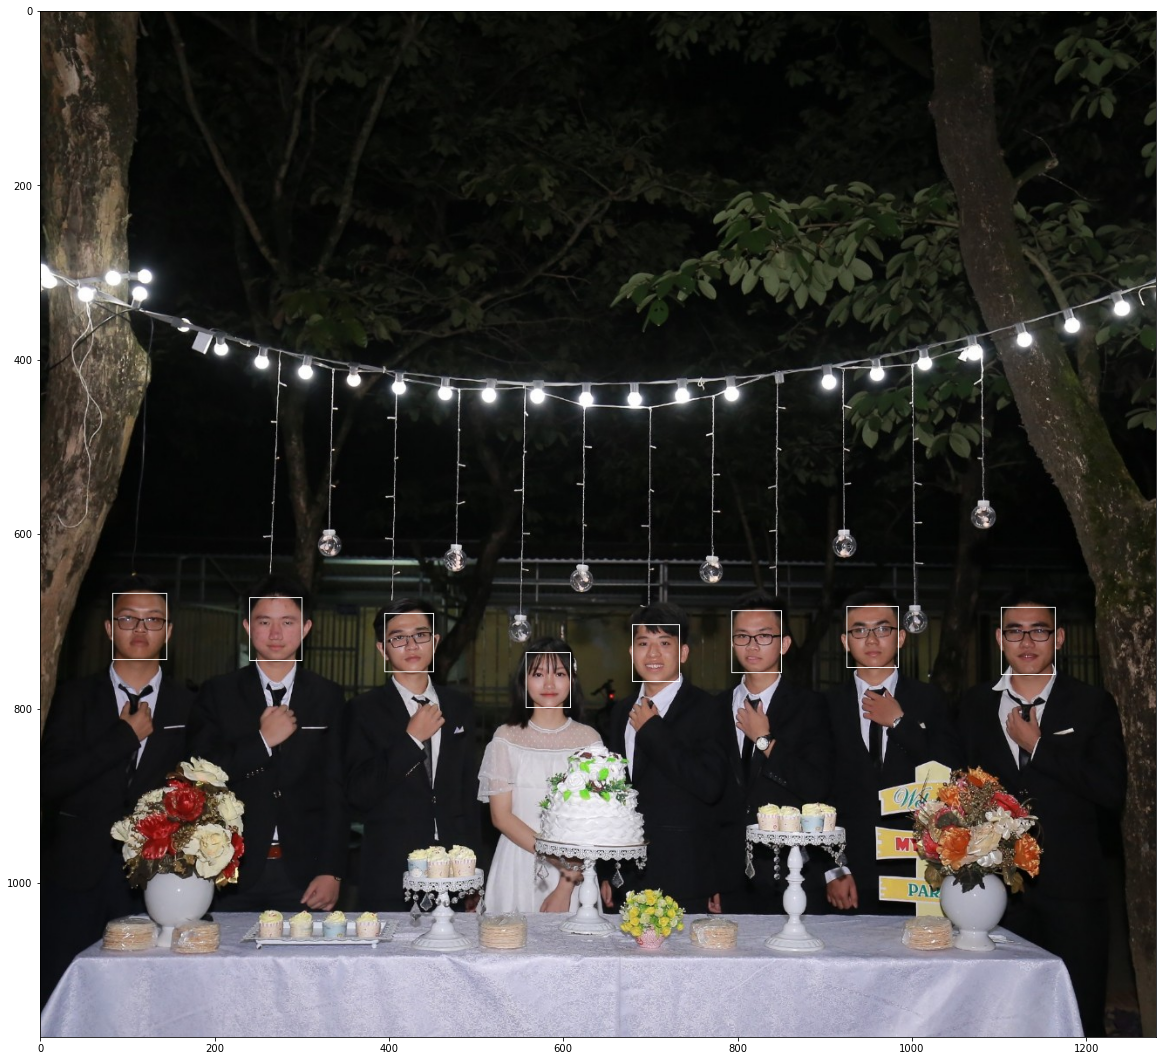

In [18]:
plt.figure(figsize = (20, 20))
plt.imshow(img[:, :, ::-1])
plt.show